In [ ]:
# JMP 2024 data update on WASH in health care facilities
# https://washdata.org/how-we-work/country-and-regional-engagement/regional-analysis-2024-health-care-facilities

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("JMP-2024-wash-hcf-World-snapshot.xlsx", sheet_name="T1_Data")

# View the top few rows
df.head(21)



,name,year,urb,wat_bas_t,wat_lim_t,wat_ns_t,wat_imp_t,wat_imop_t,wat_bas_u,wat_lim_u,...,clean_ns_g,clean_pro_g,clean_trn_g,clean_bas_ng,clean_lim_ng,clean_ns_ng,clean_pro_ng,clean_trn_ng,sl,iso3
0,Afghanistan,2023,26.932999,79.00000,16.500000,4.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AFG
1,Albania,2023,64.603004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,ALB
2,American Samoa,2023,87.235001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,ASM
3,Andorra,2023,87.774002,100.00000,0.000000,0.000000,100.000000,100.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,AND
4,Angola,2023,68.687996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,AGO
5,Anguilla,2023,100.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,AIA
6,Antigua and Barbuda,2023,24.332001,NaN,NaN,0.000000,100.000000,100.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,ATG
7,Armenia,2023,63.739002,97.65000,2.350000,0.000000,100.000000,98.80000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,ARM
8,Austria,2023,59.530003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,AUT
9,Azerbaijan,2023,57.577003,100.00000,0.000000,0.000000,100.000000,100.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AZE


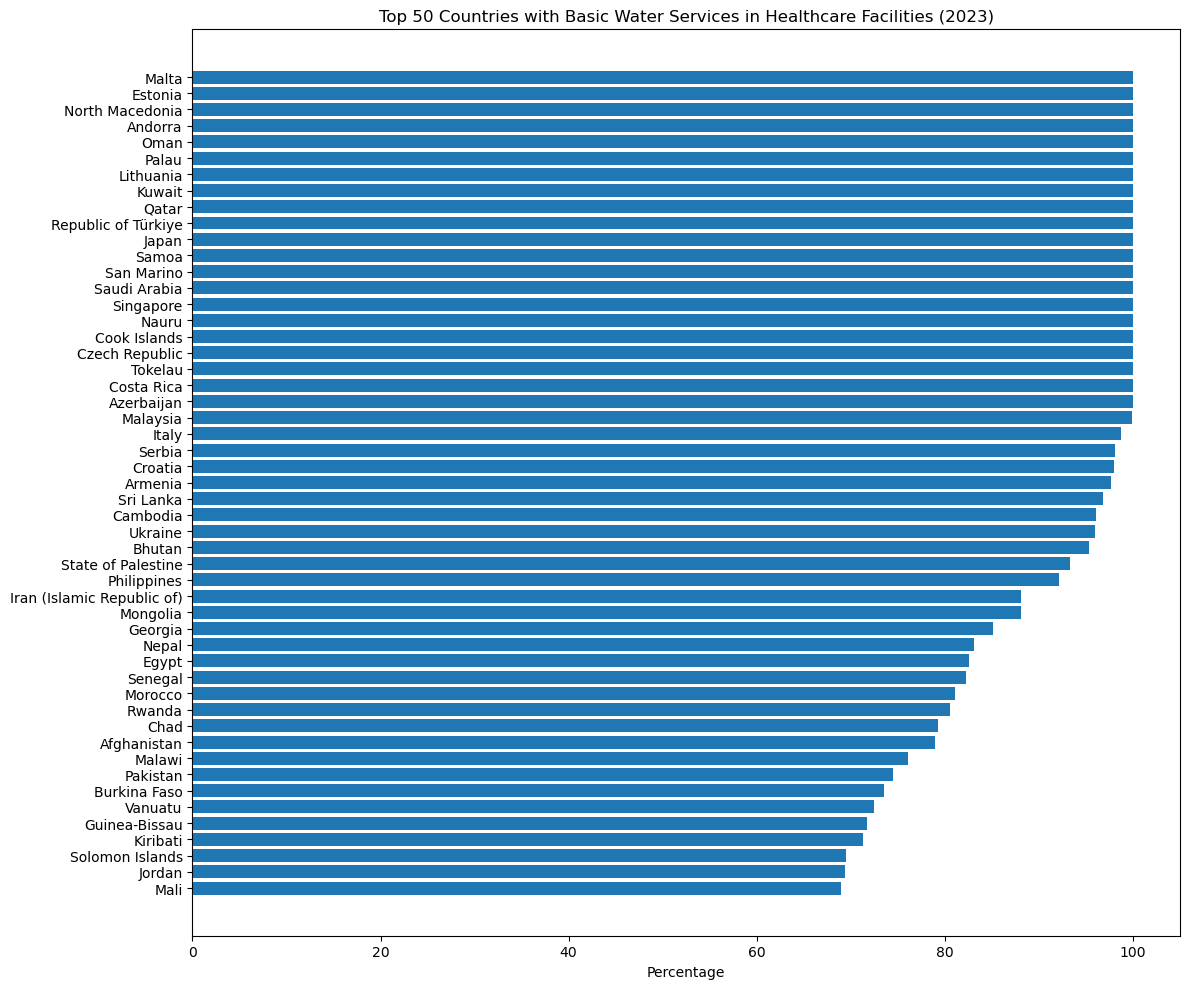

In [9]:
# Load Excel sheet
df = pd.read_excel("JMP-2024-wash-hcf-World-snapshot.xlsx", sheet_name="T1_Data")

# Select key columns
columns = ['name', 'wat_bas_t', 'wat_lim_t', 'wat_ns_t', 'clean_bas_g', 'clean_ns_g']
# Drop rows with no data
data = df[columns].dropna(how='all', subset=columns[1:]) 

# Visualize top 10 countries with basic water services
top50 = data[['name', 'wat_bas_t']].dropna().sort_values(by='wat_bas_t', ascending=False).head(51)

plt.figure(figsize=(12, 10))
plt.barh(top50['name'], top50['wat_bas_t'])
plt.xlabel("Percentage")
plt.title("Top 50 Countries with Basic Water Services in Healthcare Facilities (2023)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

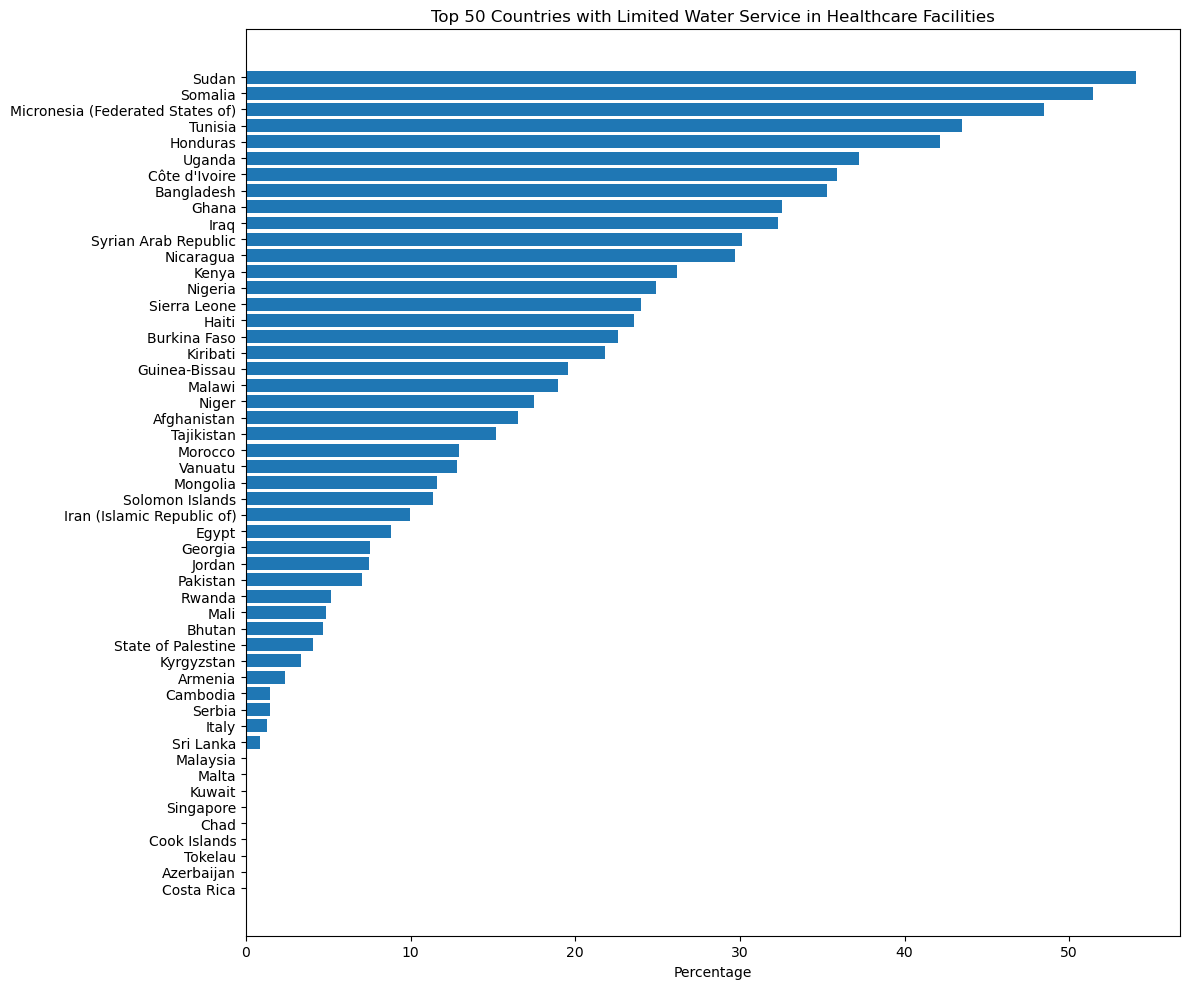

In [12]:
# Top 50 Countries with Limited Water Service
# Drop missing values and sort for top 50
top_limited = df[['name', 'wat_lim_t']].dropna()
top_limited = top_limited.sort_values(by='wat_lim_t', ascending=False).head(51)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(top_limited['name'], top_limited['wat_lim_t'])
plt.xlabel("Percentage")
plt.title("Top 50 Countries with Limited Water Service in Healthcare Facilities")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


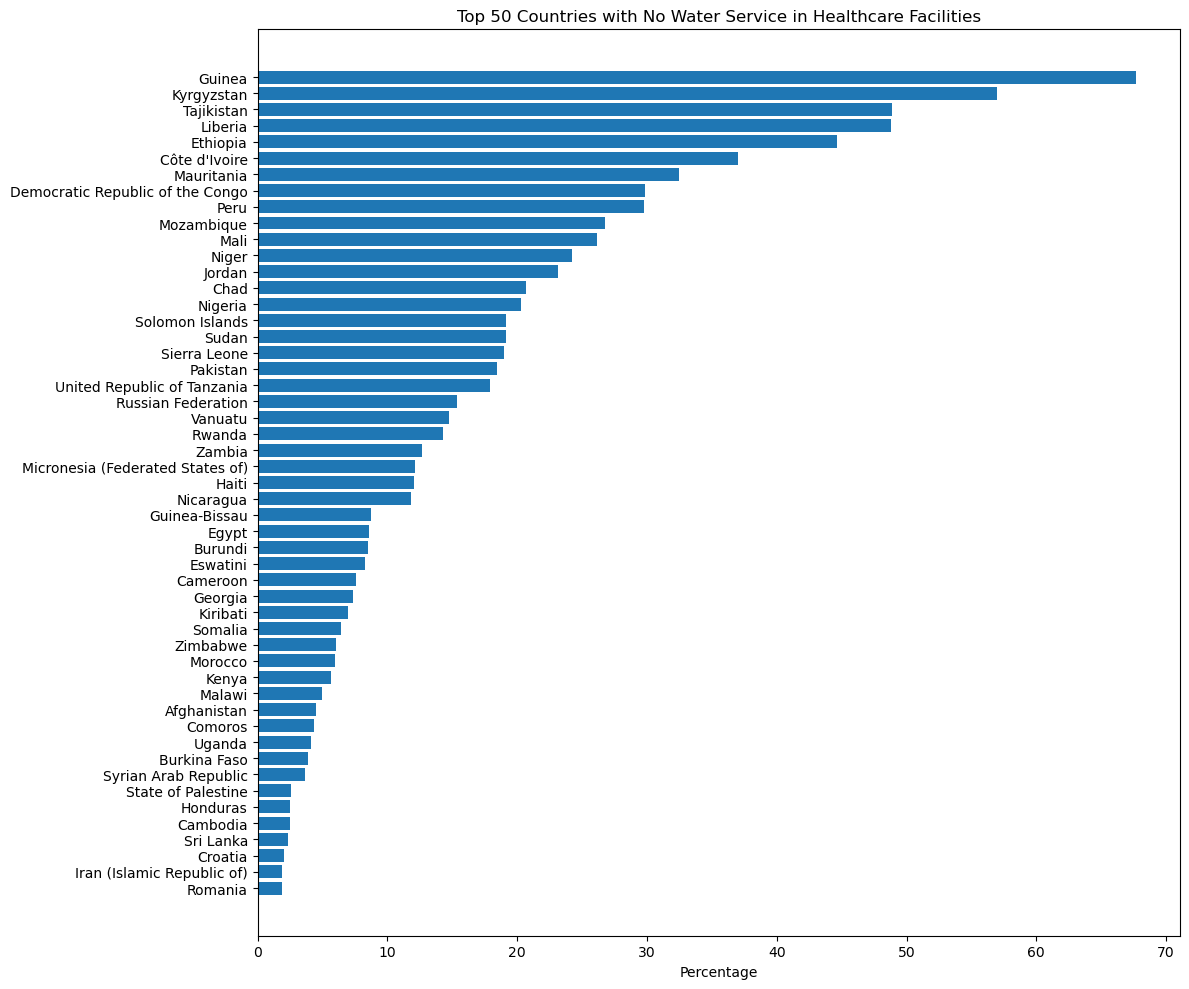

In [13]:
#  Top 50 Countries with No Water Service
# Drop missing values and sort for top 10
top_none = df[['name', 'wat_ns_t']].dropna()
top_none = top_none.sort_values(by='wat_ns_t', ascending=False).head(51)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(top_none['name'], top_none['wat_ns_t'])
plt.xlabel("Percentage")
plt.title("Top 50 Countries with No Water Service in Healthcare Facilities")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


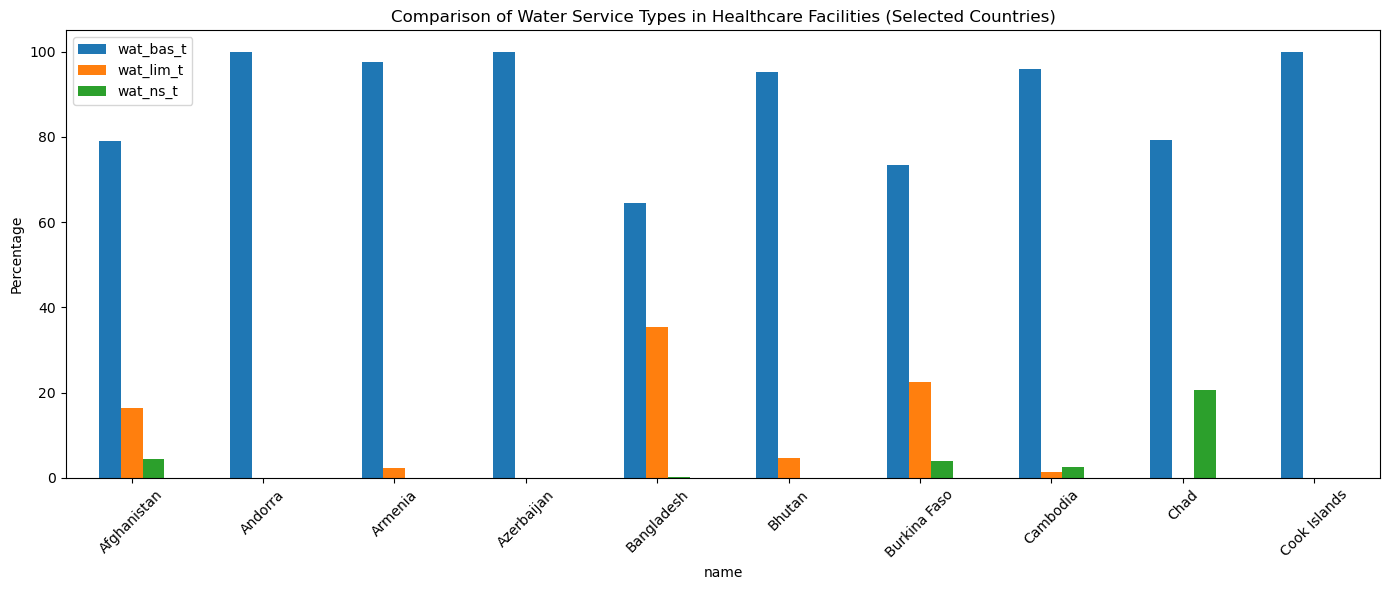

In [14]:
# Filter countries with all three values
grouped = df[['name', 'wat_bas_t', 'wat_lim_t', 'wat_ns_t']].dropna().head(10)
grouped.set_index('name', inplace=True)

# Plot grouped bars
grouped.plot(kind='bar', figsize=(14, 6))
plt.title("Comparison of Water Service Types in Healthcare Facilities (Selected Countries)")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Do countries with better access to basic water also tend to have better cleanliness (hygiene) infrastructure in healthcare?
More water service = more cleanliness

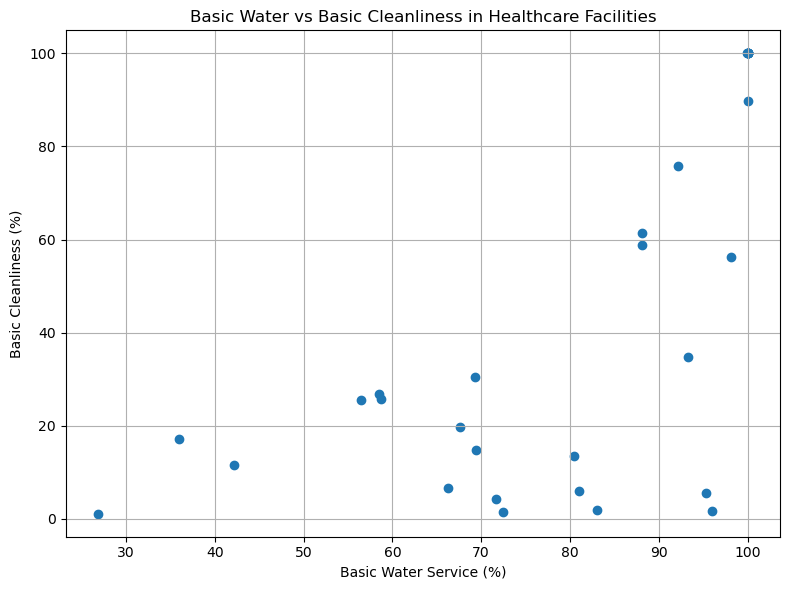

In [15]:
scatter_data = df[['wat_bas_t', 'clean_bas_g']].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['wat_bas_t'], scatter_data['clean_bas_g'])
plt.xlabel("Basic Water Service (%)")
plt.ylabel("Basic Cleanliness (%)")
plt.title("Basic Water vs Basic Cleanliness in Healthcare Facilities")
plt.grid(True)
plt.tight_layout()
plt.show()
